In [2]:
%matplotlib inline

In [10]:
import pandas as pds
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load the dataset

In [5]:
#df = sns.load_dataset('iris') # load a pandas dataframe from demo file
df = pds.read_csv('./weather.csv', sep=",") # load a pandas dataframe from csv in current directory
df.head()

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,23.720338,89.592641,7.335604,50.501694,1032.378759,rain
1,27.879734,46.489704,5.952484,4.990053,992.614190,no rain
2,25.069084,83.072843,1.371992,14.855784,1007.231620,no rain
3,23.622080,74.367758,7.050551,67.255282,982.632013,rain
4,20.591370,96.858822,4.643921,47.676444,980.825142,no rain


+ $X_{i,d}$ is the location of the $i$-th object, along dimension (feature) $d$
+ $y_i $ is the class membership of the $i$-th object


In [6]:
y = df["Rain"]
X = df.copy()
del X["Rain"]

In [7]:
y.head()

0       rain
1    no rain
2    no rain
3       rain
4    no rain
Name: Rain, dtype: object

In [8]:
X.head()

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure
0,23.720338,89.592641,7.335604,50.501694,1032.378759
1,27.879734,46.489704,5.952484,4.990053,992.614190
2,25.069084,83.072843,1.371992,14.855784,1007.231620
3,23.622080,74.367758,7.050551,67.255282,982.632013
4,20.591370,96.858822,4.643921,47.676444,980.825142


In [12]:
sts = StandardScaler(with_mean=True,with_std=True) # an operator to change scale
# To have means of 0 and a standard deviations of 1 for each attribute
# (called a zscore) according to df, we fit it on df:
sts.fit(X)
m_zscore = sts.transform(X) # store the result of the application of this scaling
# in a numpy array:
type(m_zscore)

numpy.ndarray

# Holdout training

In [7]:
from sklearn.model_selection import train_test_split

+ split the dataset into a train and test set

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

+ create a Decision Tree instance

In [9]:
dt = DecisionTreeClassifier()

+ __Fit__ the Decision Tree using the __training set__

In [10]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

+ Use the DecisionTree to __predict__ the class membership of the __test set instances__

In [11]:
y_predict = dt.predict(X_test)

+ Compute the __confusion matrix__ 

In [12]:
pds.crosstab(y_test,y_predict)

col_0,setosa,versicolor,virginica
species,,,
setosa,16,0,0
versicolor,0,18,1
virginica,0,0,15


+ Compute the model's __accuracy__

In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

0.98

+ Compute the __precision__ of the model

In [14]:
from sklearn.metrics import precision_score
precision_score(y_test,y_predict,average="weighted"), precision_score(y_test,y_predict,average="macro")

(0.98125, 0.9791666666666666)

+ Compute the recall of the model

In [15]:
from sklearn.metrics import recall_score
recall_score(y_test,y_predict,average="weighted"), recall_score(y_test,y_predict,average="macro")

(0.98, 0.9824561403508771)

+ Compute the model's __F1__ score

In [16]:
from sklearn.metrics import f1_score
f1_score(y_test,y_predict,average="weighted"), f1_score(y_test,y_predict,average="macro")

(0.9800523103748909, 0.980238302818948)

+ Classification __report__ 

In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       1.00      0.95      0.97        19
   virginica       0.94      1.00      0.97        15

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



# Plot the decision tree

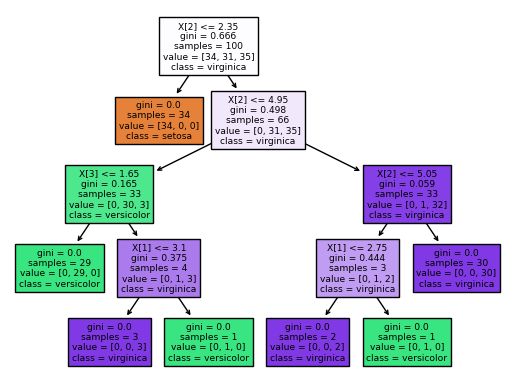

In [18]:
try:
    from sklearn.tree import plot_tree
    _=plot_tree(dt,filled=True,class_names=dt.classes_)
except ImportError:
    pass

In [19]:
try:
    from sklearn.tree import export_graphviz
    import graphviz

    dot_data = export_graphviz(dt, out_file=None, 
                           feature_names=X.columns,
                           class_names=dt.classes_, 
                           filled=True, rounded=True,
                           special_characters=True) 
    graph = graphviz.Source(dot_data)
    display(graph)
    #graph.render("out_iris_decision_tree") # to generate a pdf
    #graph.render("out_iris_decision_tree", view=True) # to generate a pdf and open it
except ImportError:
    pass

# Cross-validation

In [20]:
from sklearn.model_selection import StratifiedKFold #cross-validation splitter
from sklearn.model_selection import cross_validate #cross-validation evaluation of metrics

+ Create a __stratified cross-validation__ splitter 

In [21]:
cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)

+ You can also create a __normal cross-validation__ splitter

In [22]:
# from sklearn.model_selection import KFold
# cv = KFold(n_splits=5, shuffle=True)

+ For __small__ datasets, you could also use a __repeated holdout random subsampling__



In [23]:
# from sklearn.model_selection import ShuffleSplit
# cv = ShuffleSplit(n_splits=100, test_size=0.1) 

+ Define a __list of evaluation metrics__ to assess

In [24]:
scoring = ['accuracy',
           'precision_macro',
           'precision_weighted',
           'recall_macro',
           'recall_weighted',
           'f1_macro',
           'f1_weighted']

In [25]:
scores = cross_validate(dt, X, y, scoring=scoring,
                        cv=cv, return_train_score=True)
                                       

In [26]:
pds.DataFrame(scores).mean()

fit_time                    0.001970
score_time                  0.005937
test_accuracy               0.946667
train_accuracy              1.000000
test_precision_macro        0.955498
train_precision_macro       1.000000
test_precision_weighted     0.955498
train_precision_weighted    1.000000
test_recall_macro           0.946667
train_recall_macro          1.000000
test_recall_weighted        0.946667
train_recall_weighted       1.000000
test_f1_macro               0.945522
train_f1_macro              1.000000
test_f1_weighted            0.945522
train_f1_weighted           1.000000
dtype: float64

# Underfitting - Overfitting ?

In [27]:
import matplotlib.pyplot as plt

In [28]:
# Test several maximum numbers of leaves
cv = StratifiedKFold(n_splits=50, random_state=0, shuffle=True)
results = {}
for leaves in range(2,20):
    dt = DecisionTreeClassifier(max_leaf_nodes=leaves,criterion="entropy")
    
    local_results = cross_validate(dt, X, y, scoring=["accuracy"],cv=cv, return_train_score=True)
    avg_local_results = pds.DataFrame(local_results).mean()
    results[leaves] = avg_local_results
results_df = pds.DataFrame(results)

In [29]:
local_results # to see the format

{'fit_time': array([0.00124598, 0.00124073, 0.00123429, 0.00123882, 0.00122976,
        0.00123   , 0.00123596, 0.00130415, 0.00130606, 0.00123   ,
        0.0012207 , 0.00130296, 0.00123692, 0.00123024, 0.00122619,
        0.00140691, 0.00131202, 0.00148201, 0.001472  , 0.00149202,
        0.00140309, 0.001441  , 0.00144625, 0.00152302, 0.00146008,
        0.0014751 , 0.0014379 , 0.00145102, 0.0014441 , 0.00130987,
        0.00149393, 0.00143433, 0.00143385, 0.00156784, 0.00140595,
        0.00156593, 0.00129795, 0.001266  , 0.00127101, 0.00128698,
        0.00122762, 0.00122595, 0.00123096, 0.00122213, 0.00127602,
        0.00123286, 0.00123119, 0.00122499, 0.00123119, 0.00122905]),
 'score_time': array([0.00094676, 0.00093794, 0.00093269, 0.00095415, 0.00093102,
        0.00093913, 0.00092483, 0.00093794, 0.00093889, 0.00093317,
        0.00094318, 0.00094008, 0.00093412, 0.00092697, 0.00093389,
        0.00094223, 0.00108194, 0.00108194, 0.00098395, 0.0009861 ,
        0.00106192, 

In [30]:
pds.DataFrame(local_results)  # to see the format

,fit_time,score_time,test_accuracy,train_accuracy
0,0.001246,0.000947,1.000000,1.0
1,0.001241,0.000938,1.000000,1.0
2,0.001234,0.000933,1.000000,1.0
3,0.001239,0.000954,1.000000,1.0
4,0.001230,0.000931,1.000000,1.0
5,0.001230,0.000939,1.000000,1.0
6,0.001236,0.000925,1.000000,1.0
7,0.001304,0.000938,1.000000,1.0
8,0.001306,0.000939,0.666667,1.0
9,0.001230,0.000933,1.000000,1.0


In [31]:
results_df  # to see the format

,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
fit_time,0.001387,0.001269,0.001279,0.001265,0.001267,0.001261,0.001298,0.001250,0.001270,0.001314,0.001254,0.001249,0.001257,0.001254,0.001241,0.001245,0.001236,0.001332
score_time,0.001030,0.000955,0.000946,0.000952,0.000951,0.000943,0.000955,0.000934,0.000935,0.000958,0.000939,0.000935,0.000935,0.000932,0.000934,0.000936,0.000935,0.000964
test_accuracy,0.666667,0.940000,0.966667,0.960000,0.940000,0.946667,0.926667,0.946667,0.946667,0.940000,0.953333,0.940000,0.960000,0.946667,0.940000,0.946667,0.946667,0.940000
train_accuracy,0.666667,0.960136,0.972653,0.979728,0.979864,0.986939,0.993469,0.999592,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Text(0.5, 0, 'Max Nb. Leaves (more complexe models on the right)')

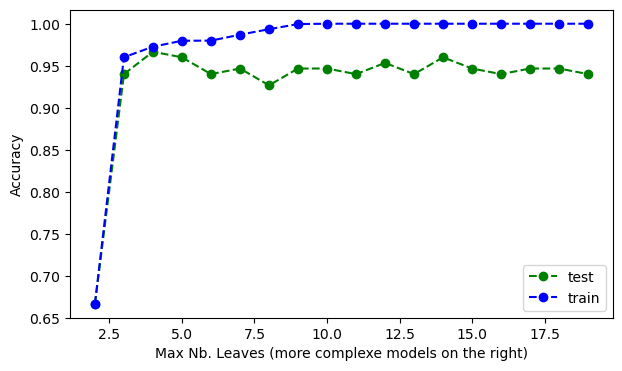

In [32]:
plt.figure(figsize=(7, 4))
plt.plot(results_df.T.index,
         results_df.T["test_accuracy"], "go--", label="test")
plt.plot(results_df.T.index,
         results_df.T["train_accuracy"],"bo--", label="train")
plt.legend()
plt.ylabel("Accuracy")
plt.xlabel("Max Nb. Leaves (more complexe models on the right)")

In [33]:
# Test several minimum leaf size
cv = StratifiedKFold(n_splits=50, random_state=0, shuffle=True)
results = {}
for leaves in range(2,20):
    dt = DecisionTreeClassifier(min_samples_leaf=leaves,criterion="entropy")
    
    local_results = cross_validate(dt, X, y, scoring=["accuracy"],cv=cv, return_train_score=True)
    avg_local_results = pds.DataFrame(local_results).mean()
    results[leaves] = avg_local_results
results_df = pds.DataFrame(results)

Text(0.5, 0, 'Min leaf size (more complex models on the left, overfitting on the left)')

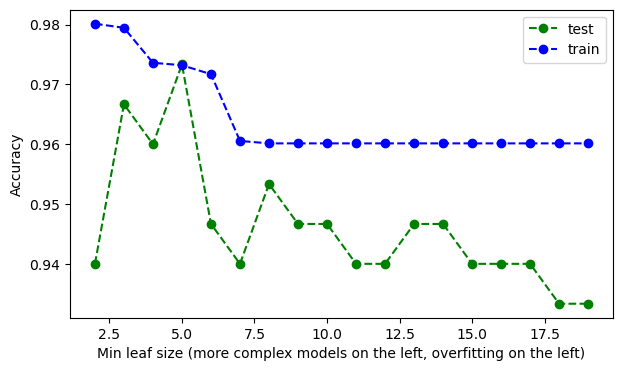

In [34]:
plt.figure(figsize=(7, 4))
plt.plot(results_df.T.index,
         results_df.T["test_accuracy"], "go--", label="test")
plt.plot(results_df.T.index,
         results_df.T["train_accuracy"],"bo--", label="train")
plt.legend()
plt.ylabel("Accuracy")
plt.xlabel("Min leaf size (more complex models on the left, overfitting on the left)")

# Using DTs to explain clusters shapes
Let us imagine that you clustered your data points using a clustering algorithm such as k-means, and that you want to better understand your clustering model.
An idea could be to train a DT to predict the data points cluster memberships, from their attributes values, and then simply check the tree structure.

In this case, it is not necessary to split the dataset into a train and a test subsets, since our goal is not to __induce a classifier__, but to __describe the clustering model using a DT__

+ Cluster the data points

In [35]:
from sklearn.cluster import KMeans
km = KMeans(3)
cluster_memberships = km.fit_predict(X)

In [36]:
# cast the cluter memberships as strings (for the visualization of the three only)
cluster_memberships = cluster_memberships.astype(str)
cluster_memberships

array(['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '0',
       '2', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '2',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '2', '0', '2', '2',
       '2', '2', '0', '2', '2', '2', '2', '2', '2', '0', '0', '2', '2',
       '2', '2', '0', '2', '0', '2', '0', '2', '2', '0', '0', '2', '2',
       '2', '2', '2', '0', '2', '2', '2', '2', '0', '2', '2', '2', '0',
       '2', '2', '2', '0', '2', '2', '0'], dtype='<U11')

+ Train a DT to predict the cluster memberships

In [37]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X,cluster_memberships)

DecisionTreeClassifier()

+ Plot the tree structure

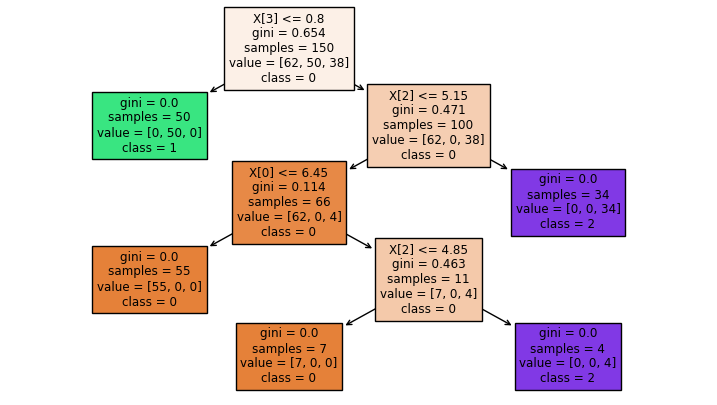

In [38]:
try:
    from sklearn.tree import plot_tree
    plt.figure(figsize=(9, 5))
    _=plot_tree(dt,filled=True,class_names=dt.classes_)
except ImportError:
    pass

In [39]:
try:
    from sklearn.tree import export_graphviz
    import graphviz

    dot_data = export_graphviz(dt, out_file=None, 
                           feature_names=X.columns,
                           class_names=dt.classes_, 
                           filled=True, rounded=True,
                           special_characters=True) 
    graph = graphviz.Source(dot_data)
    display(graph)
    #graph.render("out_iris_decision_tree") # to generate a pdf
    #graph.render("out_iris_decision_tree", view=True) # to generate a pdf and open it
except ImportError:
    pass